In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [13]:
beneficiary = pd.read_csv('datasets/Train_Beneficiarydata-1542865627584.csv')
inPatient = pd.read_csv('datasets/Train_Inpatientdata-1542865627584.csv')
outPatient = pd.read_csv('datasets/Train_Outpatientdata-1542865627584.csv')

In [14]:
inPatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,12-04-2009,18-04-2009,PRV55912,26000,PHY390922,NaN,NaN,12-04-2009,7866,1068.0,18-04-2009,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,31-08-2009,02-09-2009,PRV55907,5000,PHY318495,PHY318495,NaN,31-08-2009,6186,1068.0,02-09-2009,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,17-09-2009,20-09-2009,PRV56046,5000,PHY372395,NaN,PHY324689,17-09-2009,29590,1068.0,20-09-2009,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,14-02-2009,22-02-2009,PRV52405,5000,PHY369659,PHY392961,PHY349768,14-02-2009,431,1068.0,22-02-2009,67,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,13-08-2009,30-08-2009,PRV56614,10000,PHY379376,PHY398258,NaN,13-08-2009,78321,1068.0,30-08-2009,975,42,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


#This is one important mistake in others code#

In [20]:
#print(inPatient['ClmAdmitDiagnosisCode'].astype('int64'))
inPatient['ClmAdmitDiagnosisCode'] = inPatient['ClmAdmitDiagnosisCode'].fillna(-1)
numeric_values = pd.to_numeric(inPatient['ClmAdmitDiagnosisCode'], errors='coerce')

# Count the number of NaN values
non_integer_count = numeric_values.isna().sum()

print("Number of rows not containing integers in 'ClmAdmitDiagnosisCode' column:", non_integer_count)

Number of rows not containing integers in 'ClmAdmitDiagnosisCode' column: 1202


In [22]:
inPatient['DiagnosisGroupCode'] = inPatient['DiagnosisGroupCode'].fillna(-1)
numeric_values = pd.to_numeric(inPatient['DiagnosisGroupCode'], errors='coerce')

#Count the number of NaN values
non_integer_count = numeric_values.isna().sum()

print("Number of rows not containing integers in 'DiagnosisGroupCode' column:", non_integer_count)

Number of rows not containing integers in 'DiagnosisGroupCode' column: 113


In [18]:
outPatient['ClmAdmitDiagnosisCode'] = outPatient['ClmAdmitDiagnosisCode'].fillna(-1)
numeric_values = pd.to_numeric(outPatient['ClmAdmitDiagnosisCode'], errors='coerce')

#Count the number of NaN values
non_integer_count = numeric_values.isna().sum()

print("Number of rows not containing integers in 'ClmAdmitDiagnosisCode' column:", non_integer_count)

Number of rows not containing integers in 'ClmAdmitDiagnosisCode' column: 18783


In [19]:
outPatient.head(15)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,11-10-2009,11-10-2009,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,12-02-2009,12-02-2009,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,27-06-2009,27-06-2009,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1
3,BENE11004,CLM121801,06-01-2009,06-01-2009,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1
4,BENE11004,CLM150998,22-01-2009,22-01-2009,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
5,BENE11004,CLM173224,03-02-2009,03-02-2009,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1
6,BENE11004,CLM224741,03-03-2009,03-03-2009,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1
7,BENE11004,CLM252512,18-03-2009,18-03-2009,PRV56011,200,PHY346833,NaN,PHY346833,72290,7245,71945,71695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1
8,BENE11004,CLM322683,25-04-2009,15-05-2009,PRV56011,60,PHY372925,NaN,PHY311407,71856,7265,V1254,7295,72751,4019,9597,8449,71596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1
9,BENE11004,CLM339500,04-05-2009,16-05-2009,PRV56011,500,PHY412904,NaN,PHY396473,7237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1


In [139]:
inPatient.drop(['AdmissionDt','DischargeDt','DiagnosisGroupCode'], axis=1, inplace=True)

In [113]:
inPatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,12-04-2009,18-04-2009,PRV55912,26000,PHY390922,NaN,NaN,7866,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,31-08-2009,02-09-2009,PRV55907,5000,PHY318495,PHY318495,NaN,6186,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,17-09-2009,20-09-2009,PRV56046,5000,PHY372395,NaN,PHY324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,14-02-2009,22-02-2009,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,13-08-2009,30-08-2009,PRV56614,10000,PHY379376,PHY398258,NaN,78321,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [51]:
outPatient[:5]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,11-10-2009,11-10-2009,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,12-02-2009,12-02-2009,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,27-06-2009,27-06-2009,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,06-01-2009,06-01-2009,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,22-01-2009,22-01-2009,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [52]:
beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,01-01-1943,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,01-09-1936,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,01-08-1936,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,01-07-1922,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,01-09-1935,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [53]:
inPatient.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [54]:
inPatient['BeneID'][:5]

0    BENE11001
1    BENE11001
2    BENE11001
3    BENE11011
4    BENE11014
Name: BeneID, dtype: object

In [55]:
inPatient.info() #Contains 3 extra columns than outPatient..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   ClmAdmitDiagnosisCode   40474 non-null  object 
 10  DeductibleAmtPaid       39575 non-null  float64
 11  ClmDiagnosisCode_1      40474 non-null  object 
 12  ClmDiagnosisCode_2      40248 non-null  object 
 13  ClmDiagnosisCode_3      39798 non-null  object 
 14  ClmDiagnosisCode_4      38940 non-null

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


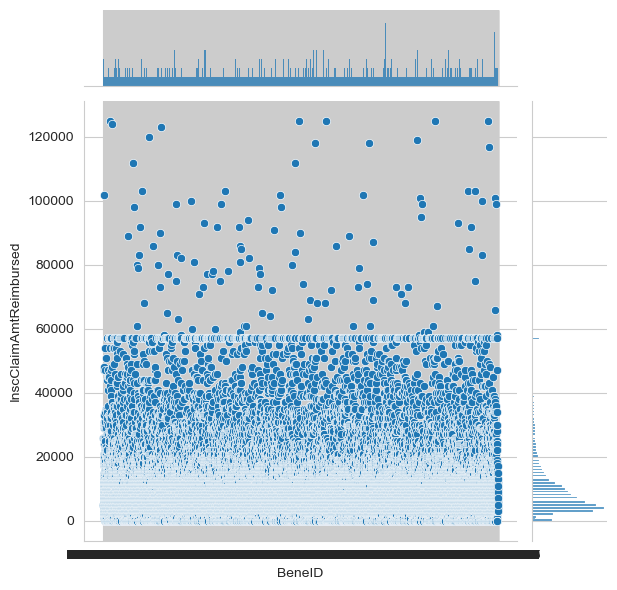

In [30]:
sns.jointplot(x='BeneID', y='InscClaimAmtReimbursed', data = inPatient)

In [56]:
outPatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [57]:
beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [140]:
patient = pd.concat([inPatient,outPatient])

In [141]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558211 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  558211 non-null  object 
 1   ClaimID                 558211 non-null  object 
 2   ClaimStartDt            558211 non-null  object 
 3   ClaimEndDt              558211 non-null  object 
 4   Provider                558211 non-null  object 
 5   InscClaimAmtReimbursed  558211 non-null  int64  
 6   AttendingPhysician      556703 non-null  object 
 7   OperatingPhysician      114447 non-null  object 
 8   OtherPhysician          199736 non-null  object 
 9   ClmAdmitDiagnosisCode   145899 non-null  object 
 10  DeductibleAmtPaid       557312 non-null  float64
 11  ClmDiagnosisCode_1      547758 non-null  object 
 12  ClmDiagnosisCode_2      362605 non-null  object 
 13  ClmDiagnosisCode_3      243055 non-null  object 
 14  ClmDiagnosisCode_4      1

In [60]:
gr_users = patient.groupby("BeneID")

In [61]:
gr_users.size()

BeneID
BENE100000     2
BENE100001    10
BENE100002    14
BENE100003     1
BENE100004     6
              ..
BENE99994      7
BENE99995      2
BENE99997      7
BENE99998      3
BENE99999      6
Length: 138556, dtype: int64

In [64]:
patient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [142]:
selected_columns = ['ClmAdmitDiagnosisCode','Provider','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10']

In [144]:
patient['BeneID'] = patient['BeneID'].str.replace('^BENE', '', regex=True)
patient['AttendingPhysician'] = patient['AttendingPhysician'].str.replace('^PHY', '', regex=True)
patient['OperatingPhysician'] = patient['OperatingPhysician'].str.replace('^PHY', '', regex=True)
patient['OtherPhysician'] = patient['OtherPhysician'].str.replace('^PHY', '', regex=True)
patient['ClaimID'] = patient['ClaimID'].str.replace('^CLM', '', regex=True)

In [125]:
patient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,11001,CLM46614,12-04-2009,18-04-2009,PRV55912,26000,390922,NaN,NaN,7866,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11001,CLM66048,31-08-2009,02-09-2009,PRV55907,5000,318495,318495,NaN,6186,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,11001,CLM68358,17-09-2009,20-09-2009,PRV56046,5000,372395,NaN,324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11011,CLM38412,14-02-2009,22-02-2009,PRV52405,5000,369659,392961,349768,431,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,11014,CLM63689,13-08-2009,30-08-2009,PRV56614,10000,379376,398258,NaN,78321,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [145]:
def enumerate_values(df, selected_columns):
    value_to_int = {}
    for col in selected_columns:
        unique_values = df[col].unique()
        for value in unique_values:
            if value not in value_to_int:
                value_to_int[value] = len(value_to_int) + 1

    for col in selected_columns:
        df[col] = df[col].map(value_to_int)

    return df

In [146]:
patient = enumerate_values(patient, selected_columns)

In [147]:
patient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,11001,46614,12-04-2009,18-04-2009,4085,26000,390922,NaN,NaN,1,...,978,779,61,1929,NaN,NaN,NaN,NaN,NaN,NaN
1,11001,66048,31-08-2009,02-09-2009,4086,5000,318495,318495,NaN,2,...,1929,1929,1929,1929,7092.0,NaN,NaN,NaN,NaN,NaN
2,11001,68358,17-09-2009,20-09-2009,4087,5000,372395,NaN,324689,3,...,1929,1929,1929,1929,NaN,NaN,NaN,NaN,NaN,NaN
3,11011,38412,14-02-2009,22-02-2009,4088,5000,369659,392961,349768,4,...,1144,990,170,1929,331.0,NaN,NaN,NaN,NaN,NaN
4,11014,63689,13-08-2009,30-08-2009,4089,10000,379376,398258,NaN,5,...,187,71,597,1929,3893.0,NaN,NaN,NaN,NaN,NaN


In [150]:
selected_columns = ['BeneID','ClaimID','InscClaimAmtReimbursed','ClmAdmitDiagnosisCode','Provider','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10']
corr = patient[selected_columns].corr()
corr

,BeneID,ClaimID,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,Provider,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
BeneID,1.000000,0.002177,-0.000551,0.003328,0.012653,0.002237,-0.000057,0.000538,0.000224,-0.001835,-0.002068,0.000827,-0.003190,0.000103,-0.000499
ClaimID,0.002177,1.000000,-0.319574,0.351774,0.141767,0.109376,0.019047,0.024539,0.031472,0.037393,0.042081,0.043550,0.044866,0.042015,0.010371
InscClaimAmtReimbursed,-0.000551,-0.319574,1.000000,-0.371002,-0.197993,-0.148414,-0.014385,-0.028219,-0.042438,-0.049414,-0.055354,-0.066017,-0.069825,-0.061010,-0.016935
ClmAdmitDiagnosisCode,0.003328,0.351774,-0.371002,1.000000,0.167416,0.156560,0.025479,0.037196,0.048041,0.054966,0.059527,0.059412,0.059225,0.053596,0.013096
Provider,0.012653,0.141767,-0.197993,0.167416,1.000000,0.069553,0.008158,0.011806,0.017137,0.022411,0.024942,0.027299,0.026543,0.025590,0.006238
ClmDiagnosisCode_1,0.002237,0.109376,-0.148414,0.156560,0.069553,1.000000,0.050957,0.043670,0.039808,0.035150,0.036160,0.033545,0.029592,0.024711,0.009631
ClmDiagnosisCode_2,-0.000057,0.019047,-0.014385,0.025479,0.008158,0.050957,1.000000,0.043000,0.032782,0.023648,0.023644,0.018412,0.012599,0.007606,0.002216
ClmDiagnosisCode_3,0.000538,0.024539,-0.028219,0.037196,0.011806,0.043670,0.043000,1.000000,0.045981,0.029098,0.028308,0.023326,0.015703,0.018093,0.006332
ClmDiagnosisCode_4,0.000224,0.031472,-0.042438,0.048041,0.017137,0.039808,0.032782,0.045981,1.000000,0.037844,0.039917,0.030441,0.021605,0.021162,0.009224
ClmDiagnosisCode_5,-0.001835,0.037393,-0.049414,0.054966,0.022411,0.035150,0.023648,0.029098,0.037844,1.000000,0.045115,0.033194,0.026401,0.021661,0.014124
